# Squaremind test

## Introduction

Difficulties concern detection of human body. What might go wrong:
- confusion with jacket on the chair
- another person is behind and can be confused
- lightning

In [1]:
from PIL import Image
import os
import numpy as np

In [3]:
%ls images

color_image_bonus.jpg  depth_image_colored.jpg  depth_image.png
color_image.jpg        depth_image_mask.png


In [4]:
image_dir = os.path.join(os.getcwd(), "images")
calibration_dir  = os.path.join(os.getcwd(), "calibration")

In [5]:
color_image = Image.open(os.path.join(image_dir, "color_image.jpg"))
depth_image = Image.open(os.path.join(image_dir, "depth_image.png"))
depth_image_mask = Image.open(os.path.join(image_dir, "depth_image_mask.png"))
depth_image_colored = Image.open(os.path.join(image_dir, "depth_image_colored.jpg"))

In [6]:
np.array(depth_image).shape

(1280, 720, 3)

In [7]:
%ls calibration

K_color_intrinsic.npy  K_depth_intrinsic.npy  T_color_to_depth_extrinsic.npy


In [8]:
K_color_intrinsic = np.load(os.path.join(calibration_dir, "K_color_intrinsic.npy"))
K_depth_intrinsic = np.load(os.path.join(calibration_dir, "K_depth_intrinsic.npy"))
T_color_to_depth_extrinsic = np.load(os.path.join(calibration_dir, "T_color_to_depth_extrinsic.npy"))


In [9]:
color_image_ar = np.array(color_image)
depth_image_ar = np.array(depth_image)
depth_image_colored_ar = np.array(depth_image_colored)

In [10]:
K_depth_intrinsic

array([[908.579,   0.   , 652.442],
       [  0.   , 908.579, 357.9  ],
       [  0.   ,   0.   ,   1.   ]])

In [11]:
import matplotlib.pyplot as plt

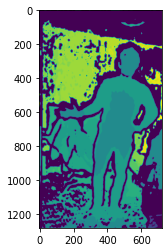

In [12]:
# All what we need to align our images:

depth_scale = 0.001


height = color_image_ar.shape[0]
width = color_image_ar.shape[1]

aligned = np.zeros((height,width,4))

for v in range (height):
    for u in range (width):
        # Apply Depth intrinsics
        z = 1
        x = ((u - K_color_intrinsic[0][2]) ) / K_color_intrinsic[0][0]
        y = ((v - K_color_intrinsic[1][2]) ) / K_color_intrinsic[1][1]
        
        # Apply extrinsic
        transformed = np.dot(T_color_to_depth_extrinsic ,np.array([x,y,z,1])).T
        aligned[v,u,0] = transformed[0]
        aligned[v,u,1] = transformed[1]
        aligned[v,u,2] = transformed[2]
        
for v in range (height):
    for u in range (width):
        # Apply RGB intrinsic
        x = (aligned[v,u,0] * K_depth_intrinsic[0][0] / aligned[v,u,2]) + K_depth_intrinsic[0][2]
        y = (aligned[v,u,1] * K_depth_intrinsic[1][1] / aligned[v,u,2]) + K_depth_intrinsic[1][2]
        
#         # Endle out of bound pixels
#         if x > width-1 or y > height-1 or x < 0 or y < 0:
#             pass
        
#         else:
        x = int(round(x))
        y = int(round(y))
        
        aligned[v,u,3] = depth_image_ar[y, x, 0]
            
# Retrive RGB value from our aligned version
depth_image_ar_aligned = np.zeros((height,width,1))
for i in range (height):
    for j in range (width):
        depth_image_ar_aligned[i,j] = aligned[i,j][3]
plt.imshow(depth_image_ar_aligned.astype(int), cmap=)

In [13]:
%ls

calibration/                                      images/
deeplabv3_xception_tf_dim_ordering_tf_kernels.h5  mask_rcnn_coco.h5
image_coco.jpg                                    pointrend_resnet50.pkl
image_deeplab.jpg                                 SoftTeacher/
image_pointrend.jpg                               test_sylvain.ipynb


In [14]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
res = segment_image.segmentAsPascalvoc(os.path.join(image_dir, "color_image.jpg"), output_image_name = "image_deeplab.jpg")


2021-10-20 22:19:33.943574: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-20 22:19:33.993154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 22:19:33.998080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-10-20 22:19:33.998094: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like t

Processed Image saved successfuly in your current working directory.


({'class_ids': array([ 0,  9, 15, 20]),
  'masks': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])},
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
   

In [15]:
import pixellib
from pixellib.instance import instance_segmentation
segment_image = instance_segmentation()

segment_image.load_model("mask_rcnn_coco.h5")
res = segment_image.segmentImage(os.path.join(image_dir, "color_image.jpg"), output_image_name = "image_coco.jpg")

Instructions for updating:
Use fn_output_signature instead


/home/sylvain/modelr-notebook/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


({'rois': array([[ 227,   90, 1212,  662],
         [ 741,  566, 1249,  717],
         [ 561,    6,  715,  139],
         [ 628,   27, 1158,  404],
         [1221,  605, 1280,  713]], dtype=int32),
  'class_ids': array([ 1, 57, 64, 57, 61], dtype=int32),
  'scores': array([0.99831223, 0.88529634, 0.8824139 , 0.79501134, 0.7251139 ],
        dtype=float32),
  'masks': array([[[False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False],
          ...,
          [False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],
  
         [[False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False],
          ...,
          [False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],
  
         [[False, False, False

In [16]:
ins = instanceSegmentation()
ins.load_model("pointrend_resnet50.pkl")
res = ins.segmentImage(os.path.join(image_dir, "color_image.jpg"), show_bboxes=False, output_image_name="image_pointrend.jpg")

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/home/sylvain/modelr-notebook/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [17]:
predictions = res[0]['masks'][:,:,0]

In [18]:
img_predictions = Image.fromarray(res[0]['masks'][:,:,0])

In [21]:
from sklearn.metrics import jaccard_score, accuracy_score
jac = jaccard_score(predictions.flatten(), (np.array(depth_image_mask)[:,:,0] == 255).flatten())
acc = accuracy_score(predictions.flatten(), (np.array(depth_image_mask)[:,:,0] == 255).flatten())

In [22]:
jac

0.8041853577996078

In [23]:
acc

0.9513563368055555

In [25]:
# apply mask on depth_image_ar_aligned
depth_image_ar_aligned.shape


(1280, 720, 1)

In [27]:
(predictions*1)

(1280, 720)